In [35]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn import preprocessing
import matplotlib.pyplot as plt
%matplotlib inline

In [36]:
# starter code with cluster numbers changes but bertin variable arbitrary clusters
fpn_csv = '/Users/smolloy/dev/parsons/ml-2020_data/option2_cluster_images.csv'
data = pd.read_csv(fpn_csv, encoding='ISO-8859-1')

In [37]:
# get column names
list(data)

['s_no',
 'artist',
 'title',
 'art_movement',
 'museum_venue',
 'country_of_origin',
 'has_text',
 'primary_medium',
 'medium',
 'work_size',
 'date',
 'representation',
 'representation_semi',
 'kinetic',
 'map',
 'map2',
 'spatial_dimension',
 'spatial_dimension2',
 'pl',
 'si',
 'va',
 'te',
 'co',
 'or',
 'sh',
 'reflection',
 'po',
 'li',
 'ar',
 'notes']

In [38]:
data.head()

,s_no,artist,title,art_movement,museum_venue,country_of_origin,has_text,primary_medium,medium,work_size,...,va,te,co,or,sh,reflection,po,li,ar,notes
0,2,Giorgio de Chirico,The Uncertainty of the Poet,surrealism,Tate,Italy,False,painting,"painting, oil on canvas",106 x 94 cm,...,3,0,0,4,3,False,0,0,5,"distorted perspective, shadow, signification o..."
1,3,Giovanni Anselmo,Direction,arte povera,Tate,Italy,False,sculpture,"sculpture, fabric, glass & metal",24 x 420 x 335 cm,...,1,3,0,3,2,False,0,0,5,"hard to understand the viewpoint, sense of for..."
2,4,Milton Avery,Yellow Sky,modernism,Tate,America,False,painting,"painting, oil on canvas",156 x 184 cm,...,2,4,4,2,4,False,0,0,5,"flatish, textured shapes & specific colors-lin..."
3,5,Gillian Avery,Distillation,abstraction,Tate,UK,False,painting,"painting, oil, household paint on hardboard",213 x 152 cm,...,1,2,0,2,4,False,0,0,5,"shapes, layers, paint handlng/texture, orienta..."
4,6,Joseph (Jef) Banc,Pair-Bearing Matrix,abstraction,Tate,France,False,painting,"painting, mixed media on canvas",73 x 60 cm,...,1,4,1,0,4,False,0,0,5,"ambiguity through abstraction, odd shape, v te..."


In [39]:
# VARIABLES: color, shape, value, point, line, area, texture, knietic, map, spatial dimension, has text, reflection
X = data[['primary_medium','va', 'co', 'te', 'spatial_dimension']]

In [40]:
X.head()

,primary_medium,va,co,te,spatial_dimension
0,painting,3,0,0,False
1,sculpture,1,0,3,True
2,painting,2,4,4,False
3,painting,1,0,2,False
4,painting,1,1,4,False


In [41]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import OneHotEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import adjusted_rand_score

In [70]:
    #LABEL BINARIZER METHOD
# lb = preprocessing.LabelBinarizer()
# lb.fit(['drawing'], ['installation'], ['painting'], ['photography'], ['print'], ['sculpture'], ['video_film'])
# LabelBinarizer()
# lb.classes_
# TypeError: fit() takes 2 positional arguments but 8 were given


    #PD DATA METHOD I.E. BRUTE FORCE - I KNOW THIS IS NOT THE BEST WAY
# data.primary_medium[data.primary_medium == ''] = 0    
# data.primary_medium[data.primary_medium == 'drawing'] = 1
# data.primary_medium[data.primary_medium == 'installation'] = 2
# data.primary_medium[data.primary_medium == 'painting'] = 3
# data.primary_medium[data.primary_medium == 'photography'] = 4
# data.primary_medium[data.primary_medium == 'print'] = 5
# data.primary_medium[data.primary_medium == 'sculpture'] = 6
# data.primary_medium[data.primary_medium == 'video_film'] = 7

# print(data.primary_medium)


    #BINARIZING TEXT METHOD - Binarize text/string columns to numbers    
enc = OneHotEncoder(handle_unknown='ignore')
X = [['drawing'], ['installation'], ['painting'], ['photography'], ['print'], ['sculpture'], ['video_film']]
enc.fit(X)
enc.transform([['drawing', 1], ['installation', 2], ['painting', 3], ['photography', 4], ['print', 5], ['sculpture', 6], ['video_film', 7]]).toarray()


enc.inverse_transform
enc.get_feature_names()

# medium = [['drawing', 1], ['installation', 2], ['painting', 3], ['photography', 4], ['print', 5], ['sculpture', 6], ['video_film', 7]]

# enc.transform([['drawing', 1], ['installation', 2], ['painting', 3], ['photography', 4], ['print', 5], ['sculpture', 6], ['video_film', 7]]).toarray()
# enc.transform([['drawing'], ['installation'], ['painting'], ['photography'], ['print'], ['sculpture'], ['video_film']]).toarray()

# enc.inverse_transform([[0, 1, 1, 0, 0], [0, 0, 0, 1, 0]])


array(['x0_drawing', 'x0_installation', 'x0_painting', 'x0_photography',
       'x0_print', 'x0_sculpture', 'x0_video_film', 'x1_1', 'x1_2',
       'x1_3', 'x1_4', 'x1_5', 'x1_6', 'x1_7'], dtype=object)

In [54]:
# container to store inertia scores over iterations
distortions = []

# fit KMeans iteratively to begin to assess the appropriate number of clusters
for i in range(1, 101):
    km = KMeans(n_clusters=i)
    km.fit(X)
    distortions.append(km.inertia_)  
        
# vizualize change in inertia
plt.plot(range(1, 101), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

ValueError: could not convert string to float: 'painting'

In [31]:
# modify this list to include the numbers of clusters you want to see
# I have *arbitrarily* chosen these values
range_n_clusters = [3, 4, 5, 8, 9, 10, 12, 15]

For n_clusters = 3 The average silhouette_score is : 0.35093809336542214


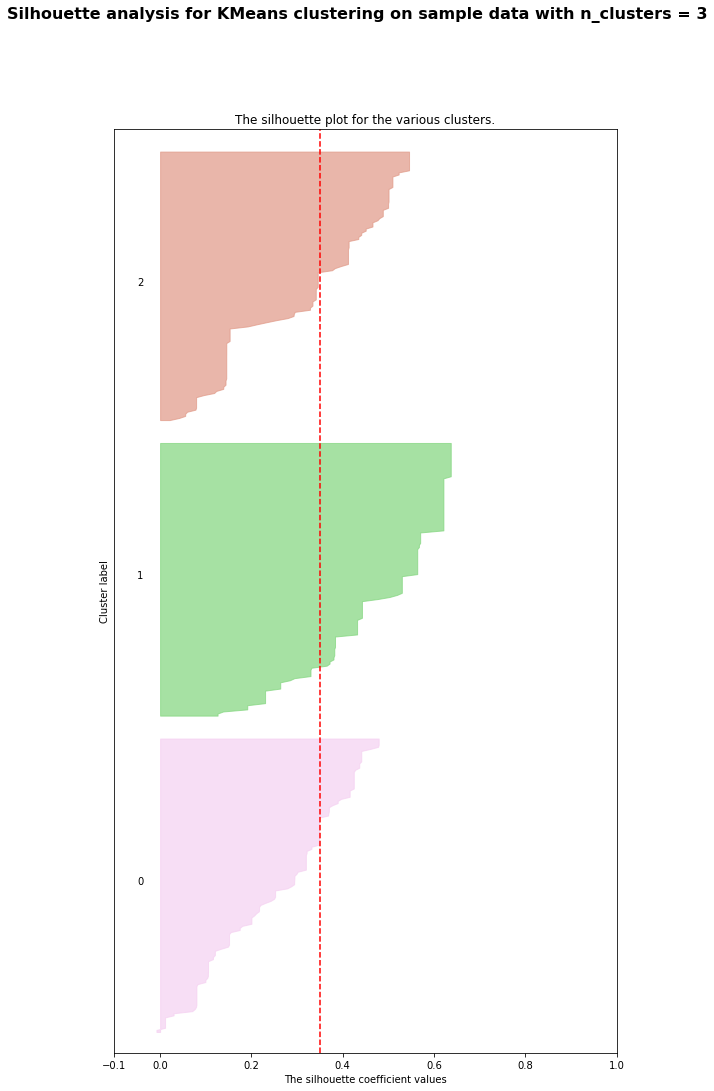

For n_clusters = 4 The average silhouette_score is : 0.37766962900202905


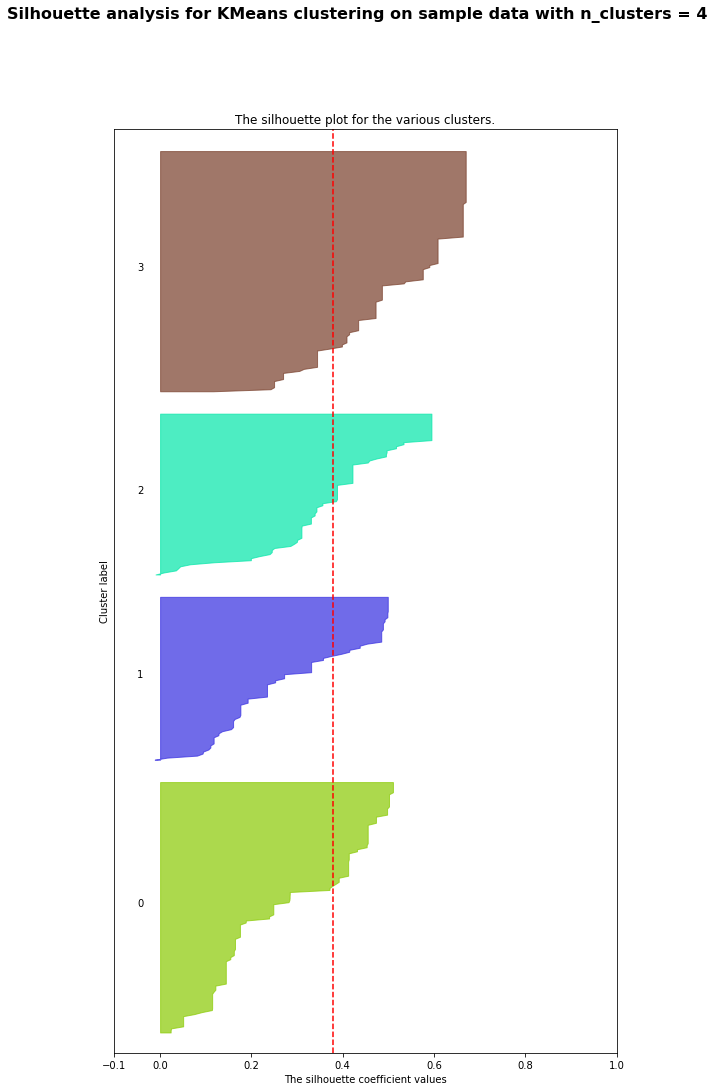

For n_clusters = 5 The average silhouette_score is : 0.39413763256865325


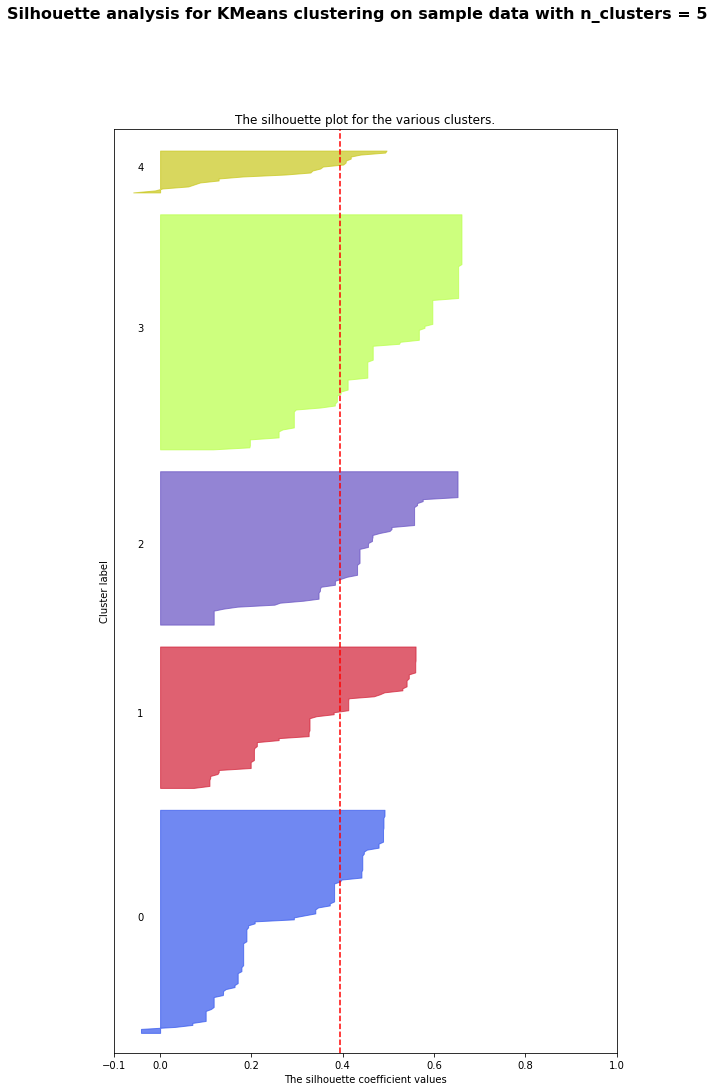

For n_clusters = 8 The average silhouette_score is : 0.3334107526868162


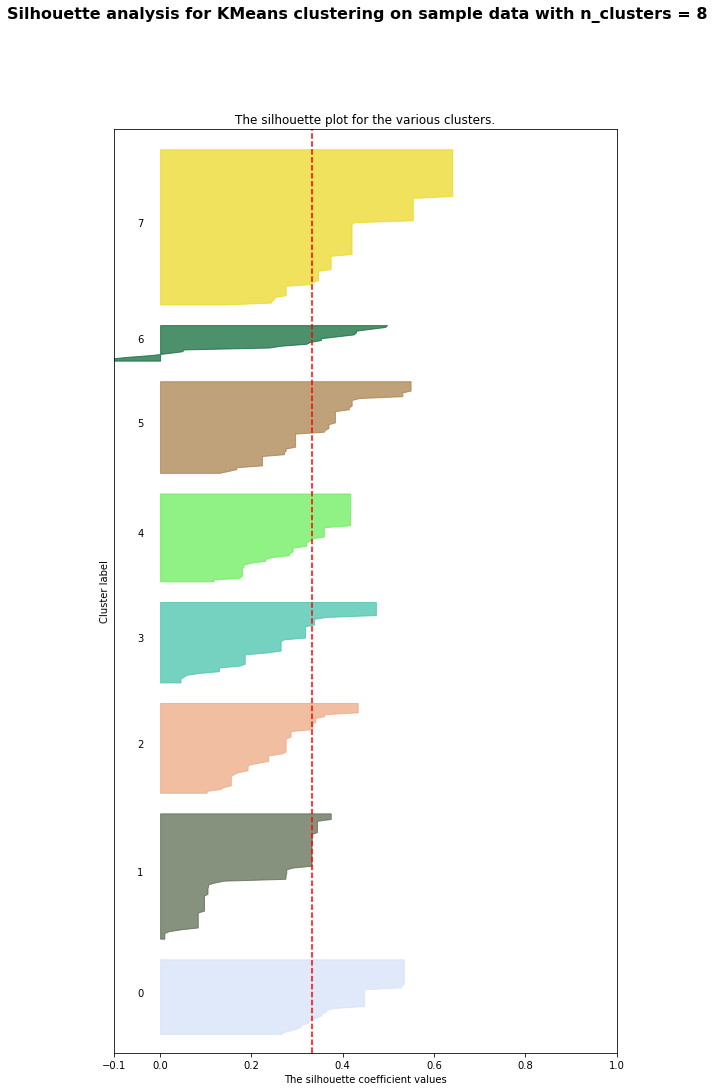

For n_clusters = 9 The average silhouette_score is : 0.3266150176929965


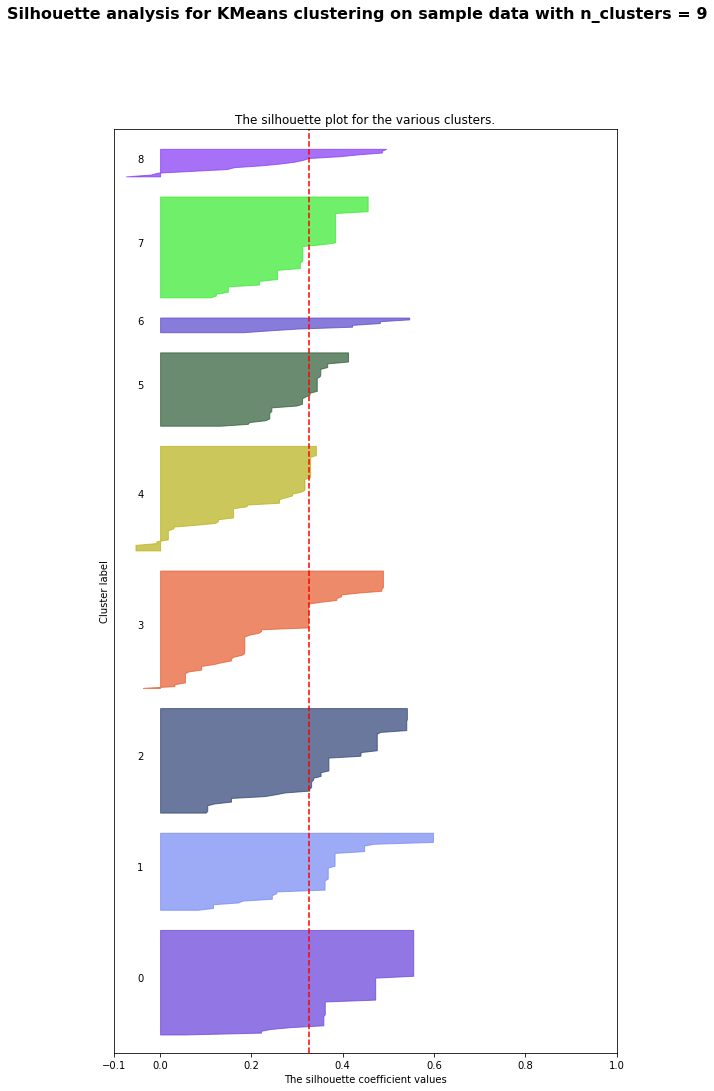

For n_clusters = 10 The average silhouette_score is : 0.3327998488377939


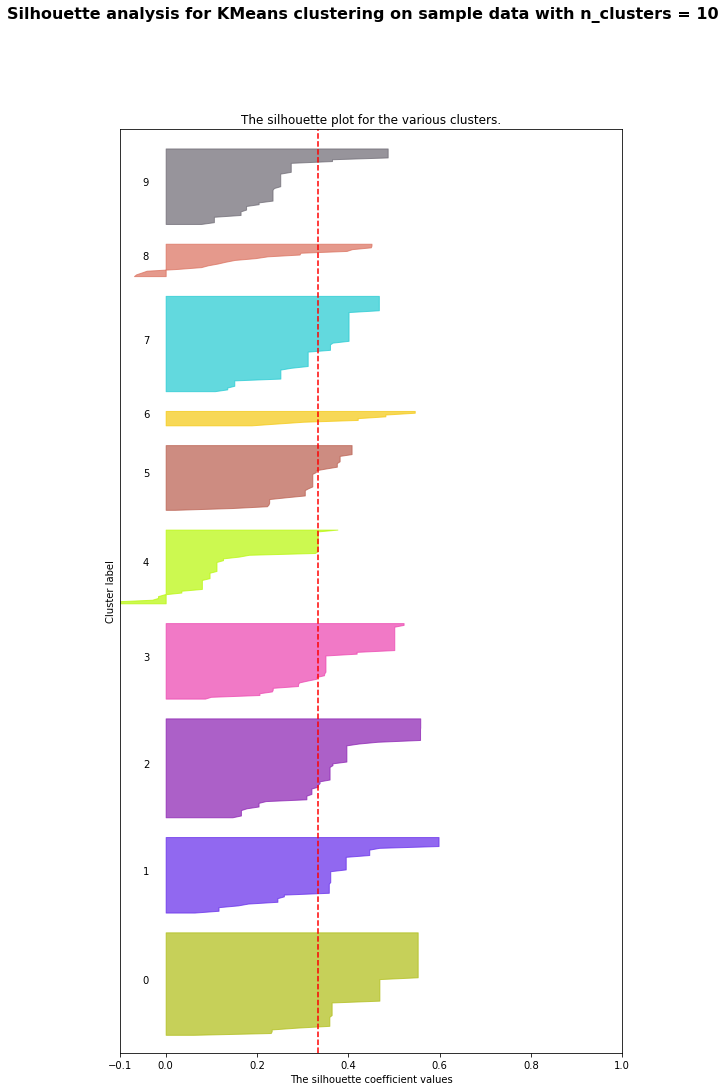

For n_clusters = 12 The average silhouette_score is : 0.3484978523522575


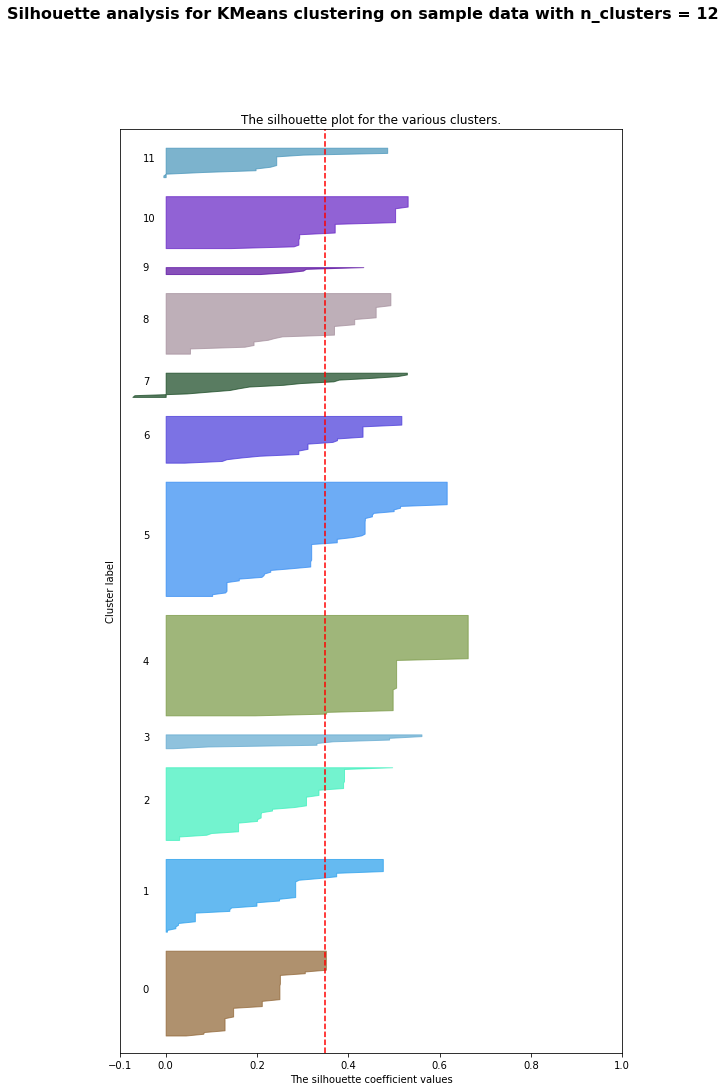

For n_clusters = 15 The average silhouette_score is : 0.34233559583440504


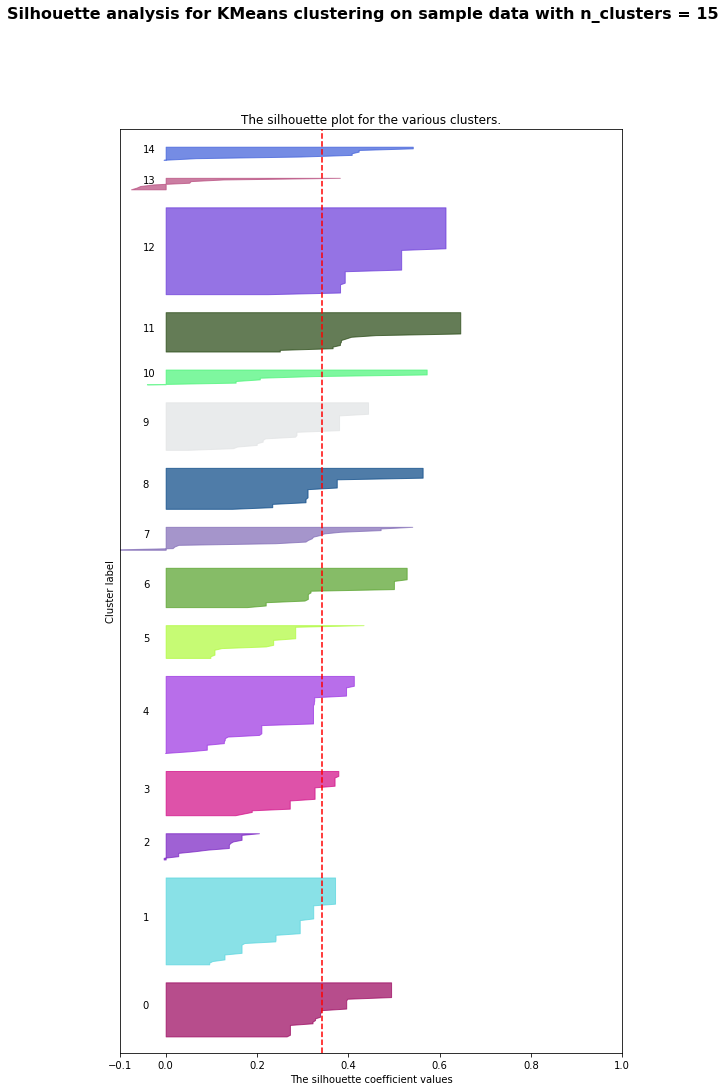

In [32]:
# modified from: http://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html

from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm
import random

for n_clusters in range_n_clusters:
    # Create a subplot
    fig, (ax1) = plt.subplots(1, 1)
    fig.set_size_inches(9, 17)

    # The silhouette coefficient can range from -1, 1 but in this example all lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters, "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        # select a random color for this cluster
        r = lambda: random.randint(0,255)
        color = '#%02X%02X%02X' % (r(),r(),r())
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=16, fontweight='bold')

    plt.show()

In [33]:
# set the number of clusters in the final model
my_n_clusters = 10

In [34]:
km = KMeans(n_clusters=my_n_clusters)
km.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=10, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [42]:
for i in range(0, max(km.labels_)+1):
    print(" ")
    print("* * * * * * * * * * * * * * * * * * * * * * * * * * * * * * ")
    print("List of images in cluster " + str(i))
    print("* * * * * * * * * * * * * * * * * * * * * * * * * * * * * * ")
    for j in range(0, len(km.labels_)):
        if km.labels_[j] == i:
            print(str(j+2) + '_small.jpg')

 
* * * * * * * * * * * * * * * * * * * * * * * * * * * * * * 
List of images in cluster 0
* * * * * * * * * * * * * * * * * * * * * * * * * * * * * * 
25_small.jpg
89_small.jpg
101_small.jpg
102_small.jpg
115_small.jpg
319_small.jpg
341_small.jpg
343_small.jpg
352_small.jpg
371_small.jpg
381_small.jpg
 
* * * * * * * * * * * * * * * * * * * * * * * * * * * * * * 
List of images in cluster 1
* * * * * * * * * * * * * * * * * * * * * * * * * * * * * * 
11_small.jpg
22_small.jpg
30_small.jpg
69_small.jpg
88_small.jpg
122_small.jpg
125_small.jpg
141_small.jpg
150_small.jpg
151_small.jpg
176_small.jpg
178_small.jpg
180_small.jpg
203_small.jpg
212_small.jpg
236_small.jpg
244_small.jpg
245_small.jpg
267_small.jpg
268_small.jpg
273_small.jpg
274_small.jpg
285_small.jpg
298_small.jpg
310_small.jpg
321_small.jpg
325_small.jpg
338_small.jpg
361_small.jpg
375_small.jpg
376_small.jpg
379_small.jpg
382_small.jpg
383_small.jpg
 
* * * * * * * * * * * * * * * * * * * * * * * * * * * * * * 
List of im

In [2]:
#display image thumbnails in each cluster 
from IPython.display import display, Image

for i in range(0, max(km.labels_)+1):
    print ("---------")
    print ("View of images in cluster " + str(i))
    print ("---------")
    for j in range(0, len(km.labels_)):
        if km.labels_[j] == i:
            img_path = "/Users/smolloy/dev/parsons/ml-2020_data/ml-master/ML_assignment_3/option_2/img_small/" + str(j+2) + "_small.jpg"
            display(Image(img_path))

NameError: name 'km' is not defined